Experiments when I was reading chapter 02 of book "Hands-On Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

np.random.seed(42)

## Getting data

In [12]:
df = pd.read_csv("datasets/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [45]:
df["date_sold"] = pd.to_datetime(df.date).astype(int)

In [46]:
df["date_sold"].head()

0    1413158400000000000
1    1418083200000000000
2    1424822400000000000
3    1418083200000000000
4    1424217600000000000
Name: date_sold, dtype: int64

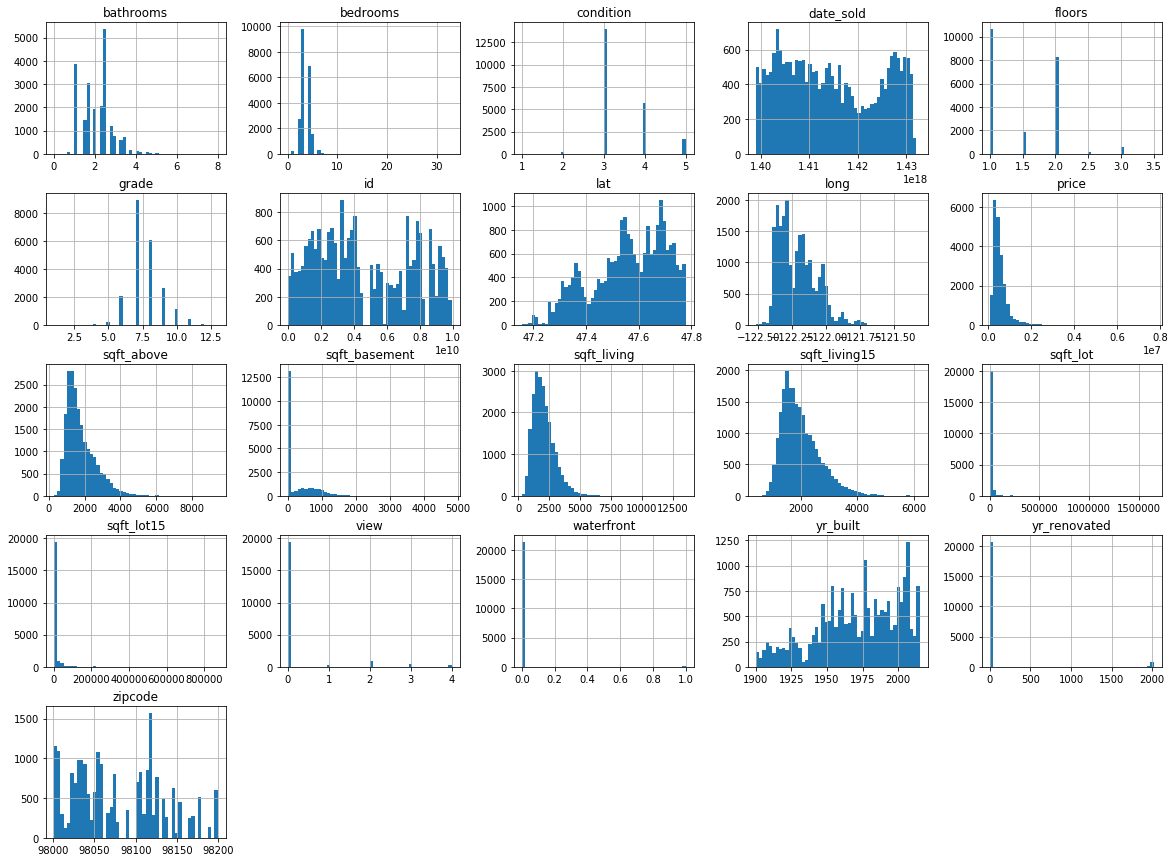

In [47]:
df.hist(bins=50, figsize=(20,15));

In [51]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

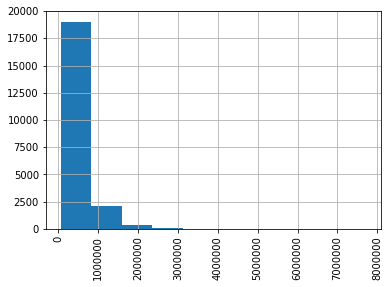

In [54]:
df.price.hist(xrot=90)

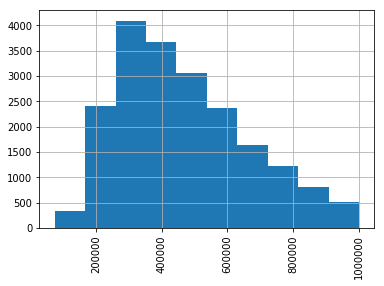

In [55]:
df.price[df.price<1000000].hist(xrot=90)

## Exploring data

In [95]:
housing = train_set.copy()

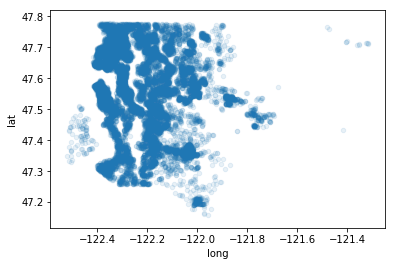

In [61]:
housing.plot(kind="scatter", x="long", y="lat", alpha=0.1)

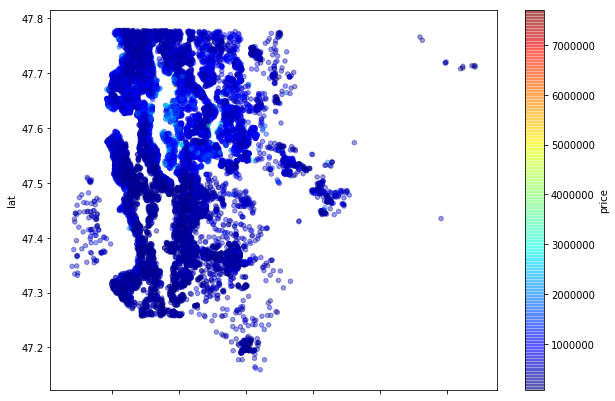

In [63]:
housing.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [64]:
housing.skew()

id                0.240727
price             4.032185
bedrooms          2.304038
bathrooms         0.464500
sqft_living       1.370978
sqft_lot         11.589007
floors            0.615275
waterfront       11.681883
view              3.402525
condition         1.028289
grade             0.758156
sqft_above        1.427666
sqft_basement     1.570704
yr_built         -0.471828
yr_renovated      4.593320
zipcode           0.402039
lat              -0.486976
long              0.866807
sqft_living15     1.095409
sqft_lot15        9.701509
date_sold         0.183523
dtype: float64

In [73]:
float(housing[housing.price < 1000000].shape[0]) / housing.shape[0] * 100.0

93.25621746674379

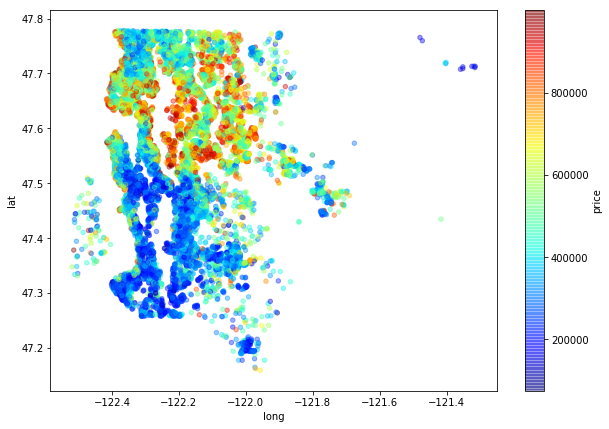

In [83]:
housing[housing.price < 1000000].plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [76]:
max(housing.long), min(housing.long), max(housing.lat), min(housing.lat)

(-121.315, -122.51899999999999, 47.7776, 47.159300000000002)

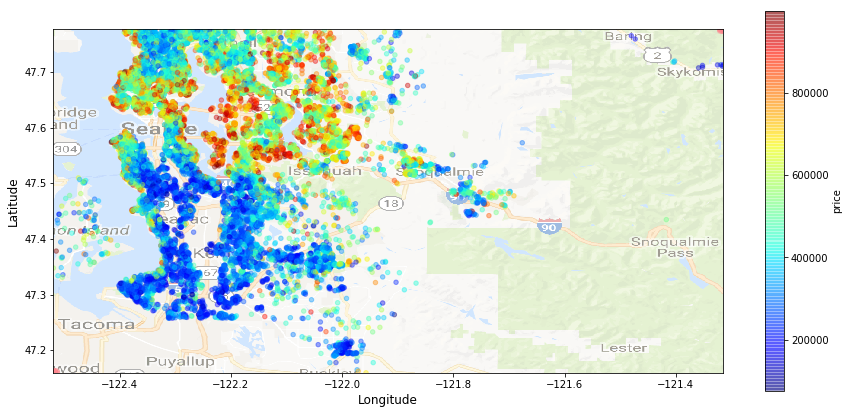

In [82]:
import matplotlib.image as mpimg

# The map was generated from Google maps by specifying two points
# on http://www.hamstermap.com/quickmap.php
housing[housing.price < 1000000].plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(15,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.imshow(mpimg.imread("datasets/king_county.png"), extent=[-122.519, -121.315, 47.1593, 47.7776], alpha=0.5)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Longitude", fontsize=12)

plt.legend()

In [85]:
housing.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701701
grade            0.665093
sqft_above       0.603255
sqft_living15    0.582667
bathrooms        0.526618
view             0.392108
sqft_basement    0.321387
lat              0.310770
bedrooms         0.308262
floors           0.253425
waterfront       0.252946
yr_renovated     0.127737
sqft_lot         0.091039
sqft_lot15       0.079152
yr_built         0.049100
condition        0.036344
long             0.023486
date_sold        0.003880
id              -0.020623
zipcode         -0.053803
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ba5a128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b9773c8>]], dtype=object)

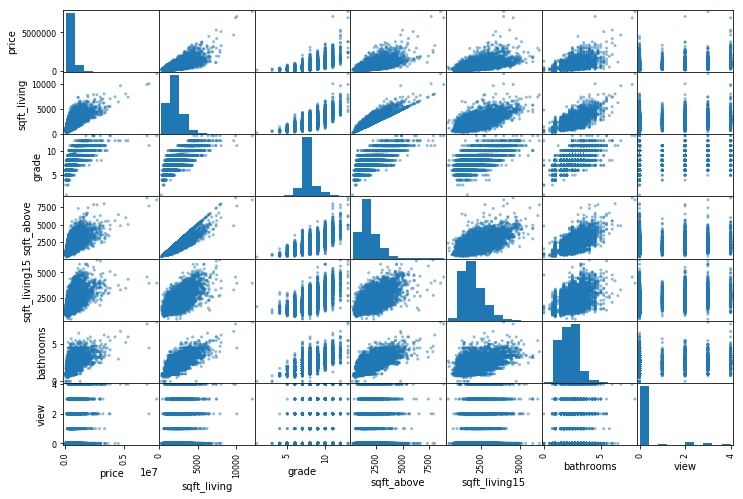

In [87]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view"]
scatter_matrix(housing[attributes], figsize=(12, 8));

In [102]:
housing["house_age"] = pd.to_datetime(housing.date).dt.year - housing.yr_built
housing[["house_age","date_sold","yr_built","price"]].corr()

,house_age,date_sold,yr_built,price
house_age,1.000000,0.014556,-0.999874,-0.048923
date_sold,0.014556,1.000000,-0.001012,0.003880
yr_built,-0.999874,-0.001012,1.000000,0.049100
price,-0.048923,0.003880,0.049100,1.000000


In [101]:
housing["years_after_renovation"] = pd.to_datetime(housing.date).dt.year - housing.yr_renovated
housing[["years_after_renovation","date_sold","yr_renovated","price"]].corr()

,years_after_renovation,date_sold,yr_renovated,price
years_after_renovation,1.000000,0.027247,-0.999999,-0.127721
date_sold,0.027247,1.000000,-0.026247,0.003880
yr_renovated,-0.999999,-0.026247,1.000000,0.127737
price,-0.127721,0.003880,0.127737,1.000000


## Fitting model

In [115]:
del housing["house_age"]
del housing["years_after_renovation"]
housing_labels = housing["price"].copy()
housing_num = housing.drop(["date", "datetime", "year_sold", "id", "price"], axis=1)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 6325 to 15795
Data columns (total 19 columns):
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
date_sold        17290 non-null int64
dtypes: float64(4), int64(15)
memory usage: 2.6 MB


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Using pipeline instead of just scaler just to test it.
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

housing_prepared = num_pipeline.fit_transform(housing_num)
housing_prepared

array([[-0.39526335, -0.47445144, -0.32393262, ...,  1.12607326,
         0.01344043, -1.37142663],
       [-1.46896378, -1.45258323, -1.18365301, ..., -1.04652268,
        -0.28066159,  1.16898915],
       [-0.39526335, -1.45258323, -1.09547656, ..., -1.19331971,
        -0.1789339 ,  1.06276967],
       ..., 
       [-0.39526335,  0.50368036,  0.05081729, ..., -0.42997519,
        -0.36604019, -0.25612214],
       [-2.54266422, -1.77862716, -1.8670205 , ..., -1.19331971,
         0.08265159, -1.15898768],
       [ 0.67843709,  0.50368036,  1.16404497, ...,  1.52242522,
        -0.24443927,  1.30176349]])

In [117]:
housing_prepared.shape

(17290, 19)

In [118]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
print("Predictions:", lin_reg.predict(housing_prepared[:5]))
print("Labels:", housing_labels[:5])

Predictions: [ 470037.95553791  258198.96697364  158877.87254638  383199.80154872
  585106.36444313]
Labels: 6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
Name: price, dtype: float64


In [122]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

197840.98602971612

In [123]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [124]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 180127.19088428  196331.84081853  179263.94746416  187565.17529672
  165055.05862617  179302.59007053  183556.56873282  189735.71484095
  206072.96032327  169712.07480304]
Mean: 183672.312186
Standard deviation: 11430.5368531


In [125]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

55784.819110951656

In [126]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 126026.73720066  154230.5509282   128432.42260751  141679.7212562
  132732.58235708  137231.77366522  127999.80970252  131203.5799621
  134127.97038948  123439.36229876]
Mean: 133710.451037
Standard deviation: 8540.50445416


In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [129]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

177436.997507 {'max_features': 2, 'n_estimators': 3}
152321.78451 {'max_features': 2, 'n_estimators': 10}
144446.232992 {'max_features': 2, 'n_estimators': 30}
158806.103963 {'max_features': 4, 'n_estimators': 3}
139203.191316 {'max_features': 4, 'n_estimators': 10}
130525.445377 {'max_features': 4, 'n_estimators': 30}
155704.894608 {'max_features': 6, 'n_estimators': 3}
136243.840434 {'max_features': 6, 'n_estimators': 10}
129355.852535 {'max_features': 6, 'n_estimators': 30}
153653.115861 {'max_features': 8, 'n_estimators': 3}
135744.938556 {'max_features': 8, 'n_estimators': 10}
128477.737954 {'max_features': 8, 'n_estimators': 30}
169175.542373 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
144784.891057 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
160447.233339 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
138267.651308 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
153961.503575 {'bootstrap': False, 'max_features': 4, 'n_estima

In [131]:
sorted(zip(grid_search.best_estimator_.feature_importances_, list(housing_num)), reverse=True)

[(0.27824106521929398, 'sqft_living'),
 (0.20012875637354288, 'grade'),
 (0.13592822759448922, 'lat'),
 (0.068343611048951231, 'sqft_above'),
 (0.058941993681752326, 'sqft_living15'),
 (0.055551312979738164, 'long'),
 (0.036932085145961274, 'yr_built'),
 (0.028657530600419135, 'waterfront'),
 (0.024698504123409827, 'bathrooms'),
 (0.020049329809970168, 'zipcode'),
 (0.019880808993357257, 'view'),
 (0.019638748725554499, 'sqft_basement'),
 (0.014356803656357768, 'sqft_lot15'),
 (0.013911527615114681, 'sqft_lot'),
 (0.011463117290731153, 'date_sold'),
 (0.0043844687516479191, 'condition'),
 (0.0032484912709445455, 'floors'),
 (0.0031526862516637194, 'bedrooms'),
 (0.0024909308671002776, 'yr_renovated')]

In [150]:
price_corr_series = housing.corr().price
price_corr_series.name = "Pierson correlation"

importances_series = pd.Series(dict(zip(list(housing_num), grid_search.best_estimator_.feature_importances_)))
importances_series.name = "Feature importances"

pd.concat([importances_series, price_corr_series], axis=1).dropna().sort_values(by="Feature importances", ascending=False)

,Feature importances,Pierson correlation
sqft_living,0.278241,0.701701
grade,0.200129,0.665093
lat,0.135928,0.310770
sqft_above,0.068344,0.603255
sqft_living15,0.058942,0.582667
long,0.055551,0.023486
yr_built,0.036932,0.049100
waterfront,0.028658,0.252946
bathrooms,0.024699,0.526618
zipcode,0.020049,-0.053803


In [154]:
final_model = grid_search.best_estimator_

X_test = test_set.drop(["date", "datetime", "id", "price"], axis=1)
y_test = test_set["price"].copy()

X_test_prepared = num_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

153989.62324920823